In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import  Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock code
df = web.DataReader('AAPL', data_source= 'yahoo', start ='2010-01-01', end = '2020-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.520477
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020


In [6]:
#Get the number of the rows and columns in the data set
df.shape

(2769, 6)

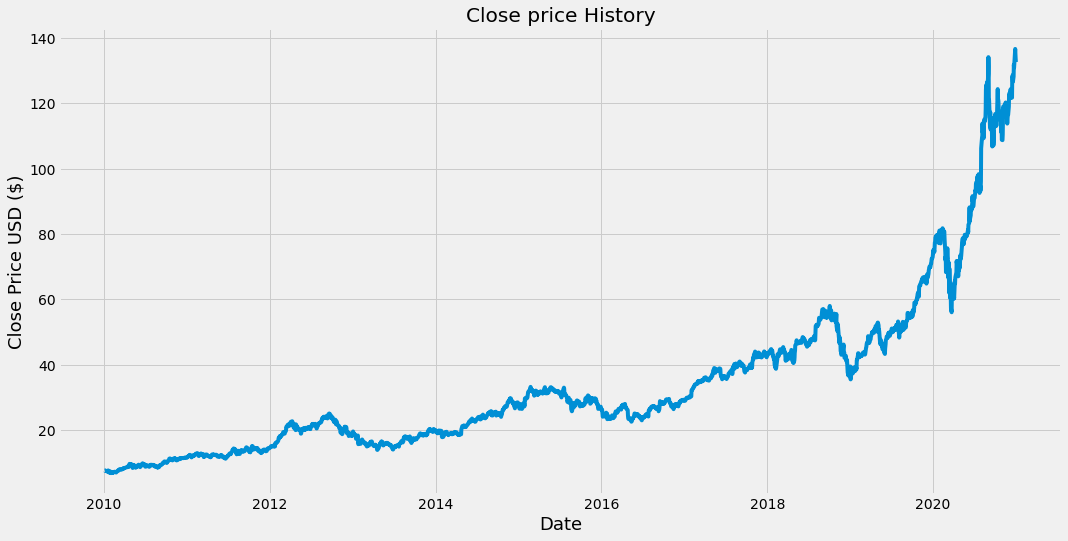

In [7]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize= 18)
plt.show()

In [8]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len =math.ceil(len(dataset) * .8)

training_data_len

2216

In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00604081],
       [0.00614259],
       [0.00520456],
       ...,
       [0.98598173],
       [0.97712411],
       [0.96919073]])

In [10]:
#create the training data set
#create the scaled training set
train_data = scaled_data[0: training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
 
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print

[array([6.04081172e-03, 6.14259465e-03, 5.20456312e-03, 5.09727473e-03,
       5.48239202e-03, 4.96799391e-03, 4.31053849e-03, 5.11653096e-03,
       4.78093337e-03, 3.81814383e-03, 6.32414606e-03, 5.41362711e-03,
       4.40681597e-03, 1.56796703e-03, 3.03140758e-03, 3.82089472e-03,
       4.35455640e-03, 1.99159311e-03, 2.74721748e-06, 7.37216546e-04,
       1.04805980e-03, 1.97508777e-03, 0.00000000e+00, 9.38024188e-04,
       5.69415915e-04, 1.13883917e-03, 8.44497592e-04, 1.82104159e-03,
       2.29143647e-03, 3.12218696e-03, 2.88836864e-03, 2.99289512e-03,
       2.64629030e-03, 2.30243636e-03, 1.37815928e-03, 2.36846140e-03,
       2.73706967e-03, 3.45778455e-03, 4.65990155e-03, 4.62138908e-03,
       4.75342080e-03, 5.13303630e-03, 7.39972211e-03, 7.43548368e-03,
       8.51930872e-03, 9.01995606e-03, 9.20150747e-03, 9.50410539e-03,
       8.74487805e-03, 8.91267501e-03, 8.82189930e-03, 8.96769281e-03,
       8.30749385e-03, 8.99520172e-03, 9.98824738e-03, 1.02660836e-02,
     

In [11]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2156, 60, 1)

In [13]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [14]:
#compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [15]:
#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2156/2156 [==============================] - 53s 23ms/step - loss: 4.3925e-04


In [16]:
#create the testing data set
#create a new array containing scaled values from index 2156 to 2796
test_data = scaled_data[training_data_len -60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])

In [17]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.4411305363743043

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location '0'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


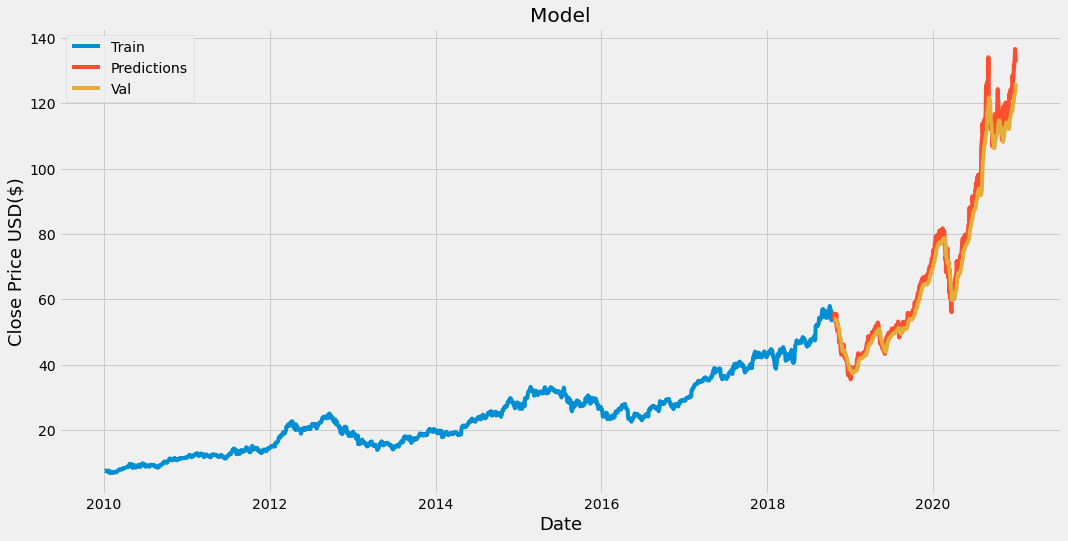

In [30]:
#Plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Predictions', 'Val'], loc = '0')
plt.show()

In [27]:
#show the valid and predited prices
valid

,Close,Predictions
Date,,
2018-10-22,55.162498,53.970650
2018-10-23,55.682499,53.959423
2018-10-24,53.772499,54.044521
2018-10-25,54.950001,53.951679
2018-10-26,54.075001,53.917648
...,...,...
2020-12-24,131.970001,122.505577
2020-12-28,136.690002,123.284225
2020-12-29,134.869995,124.490387


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end = '2020-12-31')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted data
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[133.28226]]


In [ ]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start= '2021-01-04', end = '2021-01-04'
)
print(apple_quote2['Close'])

Date
2021-01-04    129.410004
Name: Close, dtype: float64


In [ ]:
#compare 133.28226(predicted value) and 129.410004(actual value )
#Task finished